# Forecasting Solar PV Power Generation with Deep Learning

##  Introduction
In this notebook, we aim to forecast solar photovoltaic (PV) power generation using advanced deep learning techniques. We're using a publicly available [Kaggle Solar Power Generation dataset](https://www.kaggle.com/datasets/anikannal/solar-power-generation-data) to forecast solar plant.

This data has been gathered at two solar power plants in India over a 34 day period. It has two pairs of files - each pair has one power generation dataset and one sensor readings dataset. The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant.


---

##  Part 1: Exploratory Data Analysis (EDA)
We begin by investigating datasets from **Plant 1** and **Plant 2**:
- Examine distributions of power output across time
- Analyze weather features and their correlation with PV generation
- Identify anomalies or outliers in the data

**Tools & Techniques:**
- Pandas & Matplotlib for statistical summaries, correaltion and visualizations
- Time-series plots, histograms, scatter plots

---

## Part 2: Data Preprocessing
To prepare our data for modeling, we will:
- **Merge** PV generation data with corresponding weather features
- **Handle missing values** using imputation, interpolation and dropping values
- **Feature engineering**, including:
  - Cylical Time-based features (hour of day)
  - Normalization/scaling for neural networks

**Outcome:** A clean, structured dataset ready for deep learning.

---

## Part 3: Model Design and Training
Using data from **Plant 1**, we will train and compare the following models:
- **Feed-Forward NN** - Baseline model, dense layers
- **CNN** - Extracts temporal-spatial patterns
- **LSTM** - Captures long-term dependencies in time series
- **CNN-LSTM Hybrid**  - Combines spatial feature extraction with temporal learning


Each model will be trained using:
- Loss function
- Optimizer
- Train/validation split with early stopping

---

## Part 4: Model Evaluation
We'll assess each model’s forecasting ability using metrics such as:
- **RMSE** (Root Mean Squared Error)
- **MAE** (Mean Absolute Error)

Visualizations will compare:
- Predicted vs. actual PV generation
- Forecasting accuracy across different time windows

---

## Conclusion
By experimenting with diverse neural architectures, this notebook aims to identify the most effective forecasting strategy for solar PV generation.



#### **Load Solar Dataset and Inspect Sizes & Labels**

In [ ]:
# Upload data
import pandas as pd

# Plant Generation Data
df_plt1_gen = pd.read_csv('Plant_1_Generation_Data.csv')
df_plt2_gen = pd.read_csv('Plant_2_Generation_Data.csv')

# Weather Sensor Data
df_plt1_weather = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
df_plt2_weather = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')


In [ ]:
# Grab all column names from each DataFrame
all_columns_1 = df_plt1_gen.columns
all_columns_2 = df_plt2_gen.columns
all_columns_3 = df_plt1_weather.columns
all_columns_4 = df_plt2_weather.columns

# Remove any accidental duplicates
unique_columns_1 = pd.Index(all_columns_1).unique()
unique_columns_2 = pd.Index(all_columns_2).unique()
unique_columns_3 = pd.Index(all_columns_3).unique()
unique_columns_4 = pd.Index(all_columns_4).unique()

# Print out
print("Plant 1 Generation Data Varibales: ", unique_columns_1)

Plant 1 Generation Data Varibales:  Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')


In [ ]:
# Inspect 10 Sample Data for Plant 1
df_plt1_gen.sample(10, random_state=1)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
32384,31-05-2020 15:30,4135001,pkci93gMrogZuBj,3142.571429,308.771429,5405.285714,7294281.286
58525,13-06-2020 02:45,4135001,zVJPv84UY57bAof,0.000000,0.000000,0.000000,7328550.000
26110,28-05-2020 07:45,4135001,McdE0feGgRqW7Ca,4259.857143,418.400000,308.142857,7256697.143
17618,24-05-2020 05:30,4135001,WRmjgnKYAwPKWDb,0.000000,0.000000,0.000000,7093026.000
3631,16-05-2020 21:00,4135001,YxYtjZvoooNbGkE,0.000000,0.000000,6475.000000,7192732.000
39654,04-06-2020 02:45,4135001,WRmjgnKYAwPKWDb,0.000000,0.000000,0.000000,7174627.000
22786,26-05-2020 16:45,4135001,iCRJl6heRkivqQ3,6204.142857,607.871429,7617.571429,7267747.571
43162,05-06-2020 19:30,4135001,zBIq5rxdHJRwDNY,0.000000,0.000000,7723.000000,6500302.000
11802,21-05-2020 08:00,4135001,WRmjgnKYAwPKWDb,5096.400000,499.640000,405.000000,7070130.000
52279,10-06-2020 04:00,4135001,1IF53ai7Xc0U56Y,0.000000,0.000000,0.000000,6380022.000


In [ ]:
# Inspect unique Plant ID for Plant 1
df_plt1_gen['PLANT_ID'].unique()

array([4135001])

In [ ]:
# Inspect unique Source Key
df_plt1_gen['SOURCE_KEY'].unique()

array(['1BY6WEcLGh8j5v7', '1IF53ai7Xc0U56Y', '3PZuoBAID5Wc2HD',
       '7JYdWkrLSPkdwr4', 'McdE0feGgRqW7Ca', 'VHMLBKoKgIrUVDU',
       'WRmjgnKYAwPKWDb', 'ZnxXDlPa8U1GXgE', 'ZoEaEvLYb1n2sOq',
       'adLQvlD726eNBSB', 'bvBOhCH3iADSZry', 'iCRJl6heRkivqQ3',
       'ih0vzX44oOqAx2f', 'pkci93gMrogZuBj', 'rGa61gmuvPhdLxV',
       'sjndEbLyjtCKgGv', 'uHbuxQJl8lW7ozc', 'wCURE6d3bPkepu2',
       'z9Y9gH1T5YWrNuG', 'zBIq5rxdHJRwDNY', 'zVJPv84UY57bAof',
       'YxYtjZvoooNbGkE'], dtype=object)

In [ ]:
# Inspect 10 Sample Data for Plant 1
df_plt2_gen.sample(10, random_state=1)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
32664,2020-06-01 09:15:00,4136001,V94E5Ben1TlhnDV,856.171429,837.585714,1010.428571,1.412213e+09
49796,2020-06-09 12:30:00,4136001,LlT2YUhhzqhg5Sw,0.000000,0.000000,1738.000000,2.827474e+08
11165,2020-05-20 14:30:00,4136001,WcxssY2VbP4hApt,1093.766667,1068.940000,7460.800000,1.817422e+08
57445,2020-06-13 03:15:00,4136001,xoJJ8DcxJEcupym,0.000000,0.000000,4788.000000,2.093055e+08
53469,2020-06-11 06:15:00,4136001,LYwnQax7tkwH5Cb,12.213333,11.773333,1.800000,1.795079e+09
52145,2020-06-10 15:15:00,4136001,81aHJ1q11NBPMrL,304.900000,299.428571,4974.642857,1.215446e+09
53031,2020-06-11 01:15:00,4136001,Mx2yZCDsyf6DPfv,0.000000,0.000000,5563.000000,2.655714e+06
58504,2020-06-13 15:30:00,4136001,9kRcWv60rDACzjR,715.793333,700.040000,1752.066667,2.247892e+09
53003,2020-06-11 01:00:00,4136001,81aHJ1q11NBPMrL,0.000000,0.000000,0.000000,1.215447e+09
5423,2020-05-17 13:45:00,4136001,Quc1TzYxW2pYoWX,0.000000,0.000000,2533.000000,3.295222e+08


In [ ]:
# Inspect unique Plant ID for Plant 2
df_plt2_gen['PLANT_ID'].unique()

array([4136001])

In [ ]:
# Inspect unique Source Key for Plant 2
df_plt2_gen['SOURCE_KEY'].unique()

array(['4UPUqMRk7TRMgml', '81aHJ1q11NBPMrL', '9kRcWv60rDACzjR',
       'Et9kgGMDl729KT4', 'IQ2d7wF4YD8zU1Q', 'LYwnQax7tkwH5Cb',
       'LlT2YUhhzqhg5Sw', 'Mx2yZCDsyf6DPfv', 'NgDl19wMapZy17u',
       'PeE6FRyGXUgsRhN', 'Qf4GUc1pJu5T6c6', 'Quc1TzYxW2pYoWX',
       'V94E5Ben1TlhnDV', 'WcxssY2VbP4hApt', 'mqwcsP2rE7J0TFp',
       'oZ35aAeoifZaQzV', 'oZZkBaNadn6DNKz', 'q49J1IKaHRwDQnt',
       'rrq4fwE8jgrTyWY', 'vOuJvMaM2sgwLmb', 'xMbIugepa2P7lBB',
       'xoJJ8DcxJEcupym'], dtype=object)

In [ ]:
# Add plant name identifier before processing
df_plt1_gen['PLANT_NAME'] = 'Plant_1'
df_plt2_gen['PLANT_NAME'] = 'Plant_2'
df_plt2_gen.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_NAME
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,Plant_2
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,Plant_2
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,Plant_2
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,Plant_2
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,Plant_2


*Renaming to inverters/inverter column to make them easier to track.*

In [ ]:
# Process Generation Data for Plant 1
df_plt1_gen_clean = df_plt1_gen.copy()
df_plt1_gen_clean['INVERTER'] = df_plt1_gen_clean['SOURCE_KEY'].map({
    key: f'PLANT_1_INVERTER_{i+1}' for i, key in enumerate(df_plt1_gen_clean['SOURCE_KEY'].unique())
})
df_plt1_gen_clean = df_plt1_gen_clean.drop('SOURCE_KEY', axis=1)

# Preview the processed data
print("Plant 1 Generation Data:")
df_plt1_gen_clean.head()

Plant 1 Generation Data:


,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_NAME,INVERTER
0,15-05-2020 00:00,4135001,0.0,0.0,0.0,6259559.0,Plant_1,PLANT_1_INVERTER_1
1,15-05-2020 00:00,4135001,0.0,0.0,0.0,6183645.0,Plant_1,PLANT_1_INVERTER_2
2,15-05-2020 00:00,4135001,0.0,0.0,0.0,6987759.0,Plant_1,PLANT_1_INVERTER_3
3,15-05-2020 00:00,4135001,0.0,0.0,0.0,7602960.0,Plant_1,PLANT_1_INVERTER_4
4,15-05-2020 00:00,4135001,0.0,0.0,0.0,7158964.0,Plant_1,PLANT_1_INVERTER_5


In [ ]:
# Process Generation Data for Plant 2
df_plt2_gen_clean = df_plt2_gen.copy()
df_plt2_gen_clean['INVERTER'] = df_plt2_gen_clean['SOURCE_KEY'].map({
    key: f'PLANT_2_INVERTER_{i+1}' for i, key in enumerate(df_plt2_gen_clean['SOURCE_KEY'].unique())
})
df_plt2_gen_clean = df_plt2_gen_clean.drop('SOURCE_KEY', axis=1)

print("Plant 2 Generation Data:")
df_plt2_gen_clean.head()

Plant 2 Generation Data:


,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_NAME,INVERTER
0,2020-05-15 00:00:00,4136001,0.0,0.0,9425.000000,2.429011e+06,Plant_2,PLANT_2_INVERTER_1
1,2020-05-15 00:00:00,4136001,0.0,0.0,0.000000,1.215279e+09,Plant_2,PLANT_2_INVERTER_2
2,2020-05-15 00:00:00,4136001,0.0,0.0,3075.333333,2.247720e+09,Plant_2,PLANT_2_INVERTER_3
3,2020-05-15 00:00:00,4136001,0.0,0.0,269.933333,1.704250e+06,Plant_2,PLANT_2_INVERTER_4
4,2020-05-15 00:00:00,4136001,0.0,0.0,3177.000000,1.994153e+07,Plant_2,PLANT_2_INVERTER_5


In [ ]:
# Hence we see we have total 22 inverters
inverters_plt1 = df_plt1_gen_clean.INVERTER.unique()
inverters_plt1

array(['PLANT_1_INVERTER_1', 'PLANT_1_INVERTER_2', 'PLANT_1_INVERTER_3',
       'PLANT_1_INVERTER_4', 'PLANT_1_INVERTER_5', 'PLANT_1_INVERTER_6',
       'PLANT_1_INVERTER_7', 'PLANT_1_INVERTER_8', 'PLANT_1_INVERTER_9',
       'PLANT_1_INVERTER_10', 'PLANT_1_INVERTER_11',
       'PLANT_1_INVERTER_12', 'PLANT_1_INVERTER_13',
       'PLANT_1_INVERTER_14', 'PLANT_1_INVERTER_15',
       'PLANT_1_INVERTER_16', 'PLANT_1_INVERTER_17',
       'PLANT_1_INVERTER_18', 'PLANT_1_INVERTER_19',
       'PLANT_1_INVERTER_20', 'PLANT_1_INVERTER_21',
       'PLANT_1_INVERTER_22'], dtype=object)

In [ ]:
# Same for both
inverters_plt2 = df_plt2_gen_clean.INVERTER.unique()
inverters_plt2

array(['PLANT_2_INVERTER_1', 'PLANT_2_INVERTER_2', 'PLANT_2_INVERTER_3',
       'PLANT_2_INVERTER_4', 'PLANT_2_INVERTER_5', 'PLANT_2_INVERTER_6',
       'PLANT_2_INVERTER_7', 'PLANT_2_INVERTER_8', 'PLANT_2_INVERTER_9',
       'PLANT_2_INVERTER_10', 'PLANT_2_INVERTER_11',
       'PLANT_2_INVERTER_12', 'PLANT_2_INVERTER_13',
       'PLANT_2_INVERTER_14', 'PLANT_2_INVERTER_15',
       'PLANT_2_INVERTER_16', 'PLANT_2_INVERTER_17',
       'PLANT_2_INVERTER_18', 'PLANT_2_INVERTER_19',
       'PLANT_2_INVERTER_20', 'PLANT_2_INVERTER_21',
       'PLANT_2_INVERTER_22'], dtype=object)

In [ ]:
df_plt1_gen_clean.info(), df_plt2_gen_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   DC_POWER     68778 non-null  float64
 3   AC_POWER     68778 non-null  float64
 4   DAILY_YIELD  68778 non-null  float64
 5   TOTAL_YIELD  68778 non-null  float64
 6   PLANT_NAME   68778 non-null  object 
 7   INVERTER     68778 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   DC_POWER     67698 non-null  float64
 3   AC_POWER     67698 non-null  float64
 4   DAILY_YIELD  67698 non-null  float64
 5   TOT

(None, None)

In [ ]:
df_plt1_gen_clean.describe(include='all').T # stats of all columns

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DATE_TIME,68778,3158,17-06-2020 23:45,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PLANT_ID,68778.0,NaN,NaN,NaN,4135001.0,0.0,4135001.0,4135001.0,4135001.0,4135001.0,4135001.0
DC_POWER,68778.0,NaN,NaN,NaN,3147.426211,4036.457169,0.0,0.0,429.0,6366.964286,14471.125
AC_POWER,68778.0,NaN,NaN,NaN,307.802752,394.396439,0.0,0.0,41.49375,623.61875,1410.95
DAILY_YIELD,68778.0,NaN,NaN,NaN,3295.968737,3145.178309,0.0,0.0,2658.714286,6274.0,9163.0
TOTAL_YIELD,68778.0,NaN,NaN,NaN,6978711.760671,416271.982856,6183645.0,6512002.53575,7146685.0,7268705.90625,7846821.0
PLANT_NAME,68778,1,Plant_1,68778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INVERTER,68778,22,PLANT_1_INVERTER_11,3155,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_plt2_gen_clean.describe(include='all').T # stats of all columns

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DATE_TIME,67698,3259,2020-06-17 23:45:00,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PLANT_ID,67698.0,NaN,NaN,NaN,4136001.0,0.0,4136001.0,4136001.0,4136001.0,4136001.0,4136001.0
DC_POWER,67698.0,NaN,NaN,NaN,246.701961,370.569597,0.0,0.0,0.0,446.591667,1420.933333
AC_POWER,67698.0,NaN,NaN,NaN,241.277825,362.112118,0.0,0.0,0.0,438.215,1385.42
DAILY_YIELD,67698.0,NaN,NaN,NaN,3294.890295,2919.448386,0.0,272.75,2911.0,5534.0,9873.0
TOTAL_YIELD,67698.0,NaN,NaN,NaN,658944788.423766,729667771.073221,0.0,19964944.866667,282627587.0,1348495113.0,2247916295.0
PLANT_NAME,67698,1,Plant_2,67698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INVERTER,67698,22,PLANT_2_INVERTER_2,3259,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# plant 1 level we would expect 3264 unique timestamps (34 days 24 hours 4 (15 minute intervals in hour))
df_plt1_gen_clean.groupby('INVERTER').count().DATE_TIME.sort_values()

,DATE_TIME
INVERTER,
PLANT_1_INVERTER_22,3104
PLANT_1_INVERTER_3,3118
PLANT_1_INVERTER_7,3118
PLANT_1_INVERTER_10,3119
PLANT_1_INVERTER_20,3119
PLANT_1_INVERTER_2,3119
PLANT_1_INVERTER_9,3123
PLANT_1_INVERTER_16,3124
PLANT_1_INVERTER_15,3124


In [ ]:
# plant 2 level we would expect 3264 unique timestamps (34 days 24 hours 4 (15 minute intervals in hour))
df_plt2_gen_clean.groupby('INVERTER').count().DATE_TIME.sort_values()

,DATE_TIME
INVERTER,
PLANT_2_INVERTER_15,2355
PLANT_2_INVERTER_21,2355
PLANT_2_INVERTER_9,2355
PLANT_2_INVERTER_5,2355
PLANT_2_INVERTER_16,3195
PLANT_2_INVERTER_11,3195
PLANT_2_INVERTER_12,3195
PLANT_2_INVERTER_1,3195
PLANT_2_INVERTER_4,3195


In [ ]:
df_plt1_gen_clean.shape, df_plt2_gen_clean.shape

((68778, 8), (67698, 8))

### Timestamp Completeness Check

Each inverter is expected to contribute **3,264 timestamps**, and with **22 inverters**, we anticipate a total of:

**22 × 3,264 = 71,808 rows** across all inverters.

However, when checking the actual data:

- **Plant 1** has: `68,778` rows  
  → This indicates **~3,000 missing timestamps**  
- **Plant 2** has: `67,698` rows  
  → This suggests **~4,000 missing timestamps**

There is noticeable timestamp loss in both plants. Either way, this has potential implications for downstream modeling and forecast accuracy.

In [ ]:
# For Plant 1 → requires custom format
df_plt1_gen_clean['DATE_TIME'] = pd.to_datetime(df_plt1_gen_clean['DATE_TIME'], format='%d-%m-%Y %H:%M')

# For Plant 2 → already in standard format, no need for format
df_plt2_gen_clean['DATE_TIME'] = pd.to_datetime(df_plt2_gen_clean['DATE_TIME'])  # no format specified

# Check if both are correctly parsed
print(df_plt1_gen_clean['DATE_TIME'].head())
print(df_plt2_gen_clean['DATE_TIME'].head())

# Confirm dtypes
print("Plant 1:", df_plt1_gen_clean['DATE_TIME'].dtype)
print("Plant 2:", df_plt2_gen_clean['DATE_TIME'].dtype)

0   2020-05-15
1   2020-05-15
2   2020-05-15
3   2020-05-15
4   2020-05-15
Name: DATE_TIME, dtype: datetime64[ns]
0   2020-05-15
1   2020-05-15
2   2020-05-15
3   2020-05-15
4   2020-05-15
Name: DATE_TIME, dtype: datetime64[ns]
Plant 1: datetime64[ns]
Plant 2: datetime64[ns]


# Checking Weather Samples

In [ ]:
df_plt1_weather.sample(10, random_state=1)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1194,2020-05-28 02:30:00,4135001,HmiyD2TTLFNqkNe,22.398088,20.536780,0.000000
2385,2020-06-09 16:45:00,4135001,HmiyD2TTLFNqkNe,29.618705,37.964126,0.302090
99,2020-05-16 03:30:00,4135001,HmiyD2TTLFNqkNe,21.731421,20.351884,0.000000
2779,2020-06-13 19:15:00,4135001,HmiyD2TTLFNqkNe,24.000767,21.948254,0.000000
13,2020-05-15 03:15:00,4135001,HmiyD2TTLFNqkNe,24.985215,24.351508,0.000000
2304,2020-06-08 20:30:00,4135001,HmiyD2TTLFNqkNe,24.091545,20.824284,0.000000
442,2020-05-19 18:00:00,4135001,HmiyD2TTLFNqkNe,25.046377,25.426198,0.001575
2847,2020-06-14 12:15:00,4135001,HmiyD2TTLFNqkNe,24.932560,36.606858,0.472765
45,2020-05-15 11:15:00,4135001,HmiyD2TTLFNqkNe,30.216062,50.006989,0.585787
705,2020-05-22 22:45:00,4135001,HmiyD2TTLFNqkNe,23.214526,21.719092,0.000000


In [ ]:
df_plt2_weather.sample(10, random_state=1)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1060,2020-05-26 01:30:00,4136001,iq8k7ZNt4Mwm3w0,24.272992,23.955192,0.000000
1642,2020-06-01 03:15:00,4136001,iq8k7ZNt4Mwm3w0,23.685846,23.008515,0.000000
297,2020-05-18 02:30:00,4136001,iq8k7ZNt4Mwm3w0,24.847948,24.792500,0.000000
1525,2020-05-30 22:00:00,4136001,iq8k7ZNt4Mwm3w0,29.094958,25.200960,0.000000
1802,2020-06-02 19:30:00,4136001,iq8k7ZNt4Mwm3w0,27.107870,25.678657,0.000000
1197,2020-05-27 11:45:00,4136001,iq8k7ZNt4Mwm3w0,33.659671,59.534681,0.926050
1678,2020-06-01 12:15:00,4136001,iq8k7ZNt4Mwm3w0,32.324558,56.086724,0.752138
1767,2020-06-02 10:45:00,4136001,iq8k7ZNt4Mwm3w0,28.891548,41.118934,0.542142
902,2020-05-24 10:00:00,4136001,iq8k7ZNt4Mwm3w0,32.016924,54.502025,0.810606
2994,2020-06-15 05:45:00,4136001,iq8k7ZNt4Mwm3w0,24.396636,23.912439,0.000546


In [ ]:
df_plt1_weather.info(), df_plt2_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE 

(None, None)

In [ ]:
df_plt1_weather.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DATE_TIME,3182,3182,2020-06-17 23:45:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PLANT_ID,3182.0,NaN,NaN,NaN,4135001.0,0.0,4135001.0,4135001.0,4135001.0,4135001.0,4135001.0
SOURCE_KEY,3182,1,HmiyD2TTLFNqkNe,3182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMBIENT_TEMPERATURE,3182.0,NaN,NaN,NaN,25.531606,3.354856,20.398505,22.705182,24.613814,27.920532,35.252486
MODULE_TEMPERATURE,3182.0,NaN,NaN,NaN,31.091015,12.261222,18.140415,21.090553,24.61806,41.30784,65.545714
IRRADIATION,3182.0,NaN,NaN,NaN,0.228313,0.300836,0.0,0.0,0.024653,0.449588,1.221652


In [ ]:
df_plt2_weather.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DATE_TIME,3259,3259,2020-06-17 23:45:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PLANT_ID,3259.0,NaN,NaN,NaN,4136001.0,0.0,4136001.0,4136001.0,4136001.0,4136001.0,4136001.0
SOURCE_KEY,3259,1,iq8k7ZNt4Mwm3w0,3259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMBIENT_TEMPERATURE,3259.0,NaN,NaN,NaN,28.0694,4.061556,20.942385,24.602135,26.981263,31.056757,39.181638
MODULE_TEMPERATURE,3259.0,NaN,NaN,NaN,32.772408,11.344034,20.265123,23.716881,27.534606,40.480653,66.635953
IRRADIATION,3259.0,NaN,NaN,NaN,0.232737,0.312693,0.0,0.0,0.01904,0.438717,1.098766


**Cleaning Redundant Columns**

Both 'PLANT_ID' and 'SOURCE_KEY' contain constant values throughout the dataset, so they're not contributing any variability or information. Let's drop them.
Let's again make DATE_TIME a datetime object.

In [ ]:
# Clean and convert Plant 1 Weather Data
df_weather_plt1 = df_plt1_weather.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1)
df_weather_plt1['DATE_TIME'] = pd.to_datetime(df_weather_plt1['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
print("Plant 1 Weather Data:\n", df_weather_plt1.head())
print("DATE_TIME dtype - Plant 1:", df_weather_plt1['DATE_TIME'].dtype)

Plant 1 Weather Data:
             DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
0 2020-05-15 00:00:00            25.184316           22.857507          0.0
1 2020-05-15 00:15:00            25.084589           22.761668          0.0
2 2020-05-15 00:30:00            24.935753           22.592306          0.0
3 2020-05-15 00:45:00            24.846130           22.360852          0.0
4 2020-05-15 01:00:00            24.621525           22.165423          0.0
DATE_TIME dtype - Plant 1: datetime64[ns]


In [ ]:
# Clean and convert Plant 2 Weather Data
df_weather_plt2 = df_plt2_weather.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1)
df_weather_plt2['DATE_TIME'] = pd.to_datetime(df_weather_plt2['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
print("Plant 2 Weather Data:\n", df_weather_plt2.head())
print("DATE_TIME dtype - Plant 2:", df_weather_plt2['DATE_TIME'].dtype)

Plant 2 Weather Data:
             DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
0 2020-05-15 00:00:00            27.004764           25.060789          0.0
1 2020-05-15 00:15:00            26.880811           24.421869          0.0
2 2020-05-15 00:30:00            26.682055           24.427290          0.0
3 2020-05-15 00:45:00            26.500589           24.420678          0.0
4 2020-05-15 01:00:00            26.596148           25.088210          0.0
DATE_TIME dtype - Plant 2: datetime64[ns]


# Filling out missing datetimes

In order to fill in the missing datetimes for our generation and weather sensor data set let's make a datetime object with the full range of expected datetimes.

In [ ]:
datetimes_full = pd.Series(pd.date_range(df_plt1_gen_clean.DATE_TIME.min(),
                                         df_plt1_gen_clean.DATE_TIME.max(),
                                         freq='15min'),
                           name='DATE_TIME')
datetimes_full
## Here we see as above we have 3264 rows creating series to fill in the missing datapoints

,DATE_TIME
0,2020-05-15 00:00:00
1,2020-05-15 00:15:00
2,2020-05-15 00:30:00
3,2020-05-15 00:45:00
4,2020-05-15 01:00:00
...,...
3259,2020-06-17 22:45:00
3260,2020-06-17 23:00:00
3261,2020-06-17 23:15:00
3262,2020-06-17 23:30:00


Now we are ready to merge this with our data sets. Starting with the generation data set: since different inverters have some different datetimes missing we will need to do this one inverter at a time and then concatenate them back together.

In [ ]:
# Plant 1
dfs_gen_plt1 = []
inverters_plt1 = df_plt1_gen_clean['INVERTER'].unique()

for i in inverters_plt1:
    df_inv = df_plt1_gen_clean[df_plt1_gen_clean['INVERTER'] == i]
    df_inv = df_inv.merge(datetimes_full, on='DATE_TIME', how='right')
    df_inv['INVERTER'] = i
    dfs_gen_plt1.append(df_inv)

df_plt1_gen_full = pd.concat(dfs_gen_plt1)
df_plt1_merged = df_plt1_gen_full.merge(df_weather_plt1, on='DATE_TIME', how='left')

print("\nPlant 1 Final Shape:", df_plt1_merged.shape)
# Check info
print("\nPlant 1 Data Info:")
df_plt1_merged.info()


Plant 1 Final Shape: (71808, 11)

Plant 1 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71808 entries, 0 to 71807
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            71808 non-null  datetime64[ns]
 1   PLANT_ID             68778 non-null  float64       
 2   DC_POWER             68778 non-null  float64       
 3   AC_POWER             68778 non-null  float64       
 4   DAILY_YIELD          68778 non-null  float64       
 5   TOTAL_YIELD          68778 non-null  float64       
 6   PLANT_NAME           68778 non-null  object        
 7   INVERTER             71808 non-null  object        
 8   AMBIENT_TEMPERATURE  70004 non-null  float64       
 9   MODULE_TEMPERATURE   70004 non-null  float64       
 10  IRRADIATION          70004 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 6.0+ MB


In [ ]:
df_plt1_merged['PLANT_NAME'] = df_plt1_merged['PLANT_NAME'].fillna('Plant_1')

In [ ]:
df_plt1_merged.dropna(subset=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION'], inplace=True)

In [ ]:
df_plt1_merged.isnull().sum() ##This shows the null values in the dataset after merging

,0
DATE_TIME,0
PLANT_ID,1230
DC_POWER,1230
AC_POWER,1230
DAILY_YIELD,1230
TOTAL_YIELD,1230
PLANT_NAME,0
INVERTER,0
AMBIENT_TEMPERATURE,0
MODULE_TEMPERATURE,0


In [ ]:
# Plant 2
dfs_gen_plt2 = []
inverters_plt2 = df_plt2_gen_clean['INVERTER'].unique()

for i in inverters_plt2:
    df_inv = df_plt2_gen_clean[df_plt2_gen_clean['INVERTER'] == i]
    df_inv = df_inv.merge(datetimes_full, on='DATE_TIME', how='right')
    df_inv['INVERTER'] = i
    dfs_gen_plt2.append(df_inv)

df_plt2_gen_full = pd.concat(dfs_gen_plt2)
df_plt2_merged = df_plt2_gen_full.merge(df_weather_plt2, on='DATE_TIME', how='left')

print("Plant 2 Final Shape:", df_plt2_merged.shape)
print("\nPlant 2 Data Info:")
df_plt2_merged.info()

Plant 2 Final Shape: (71808, 11)

Plant 2 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71808 entries, 0 to 71807
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            71808 non-null  datetime64[ns]
 1   PLANT_ID             67698 non-null  float64       
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   PLANT_NAME           67698 non-null  object        
 7   INVERTER             71808 non-null  object        
 8   AMBIENT_TEMPERATURE  71698 non-null  float64       
 9   MODULE_TEMPERATURE   71698 non-null  float64       
 10  IRRADIATION          71698 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 6.0+ MB


In [ ]:
df_plt2_merged['PLANT_NAME'] = df_plt2_merged['PLANT_NAME'].fillna('Plant_2')

In [ ]:
df_plt2_merged.dropna(subset=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION'], inplace=True)

In [ ]:
df_plt2_merged.isnull().sum() ##This shows the null values in the dataset after merging

,0
DATE_TIME,0
PLANT_ID,4000
DC_POWER,4000
AC_POWER,4000
DAILY_YIELD,4000
TOTAL_YIELD,4000
PLANT_NAME,0
INVERTER,0
AMBIENT_TEMPERATURE,0
MODULE_TEMPERATURE,0


# Exploratory Data Analysis

Lets see what stats we can use to deal with null values in each plants for various process features.
To start our more in-depth analysis, we'll make some basic datetime features. If we were modeling throughout the year(s), month and year could be interesting to account for seasonal variation and long-term trends, but since our data only covers 34 days, we will omit them. We can use dayofyear to capture any longer trends that might be present.

Correlations

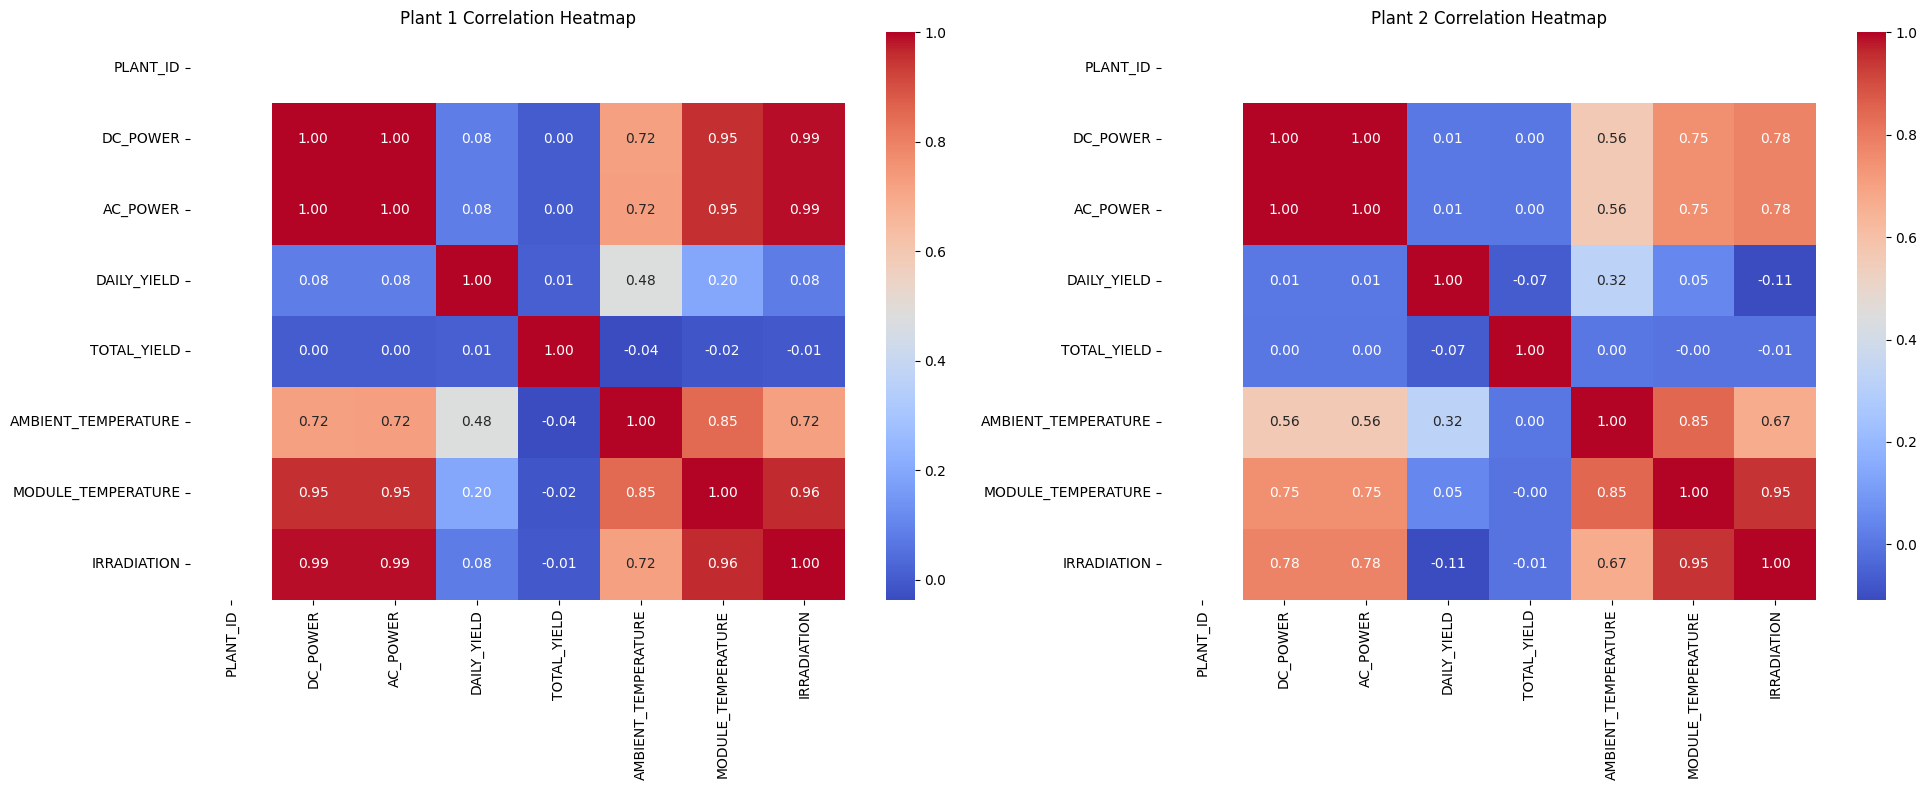

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrices
corr_plt1 = df_plt1_merged.corr(numeric_only=True)
corr_plt2 = df_plt2_merged.corr(numeric_only=True)

# Create side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plant 1 Heatmap
sns.heatmap(corr_plt1, ax=axes[0], cmap='coolwarm', annot=True, fmt=".2f")
axes[0].set_title("Plant 1 Correlation Heatmap")

# Plant 2 Heatmap
sns.heatmap(corr_plt2, ax=axes[1], cmap='coolwarm', annot=True, fmt=".2f")
axes[1].set_title("Plant 2 Correlation Heatmap")

# Adjust layout
plt.tight_layout()
plt.show()

- **DC vs. AC Power:**  
  - Plant 1: perfect correlation   
  - Plant 2: perfect correlation

- **Irradiation → Power:**  
  - Both plants: high correlation → sunlight is the primary driver

- **Temperature Effects:**  
  - Module temp & Ambient temp is moderately correlated with AC

- **Yield Metrics:**  
  - Poor correlation with other metrics in both plants

**Takeaway:** Irradiation, module temperature, and past power readings are clearly the strongest predictors—perfect for our models.  


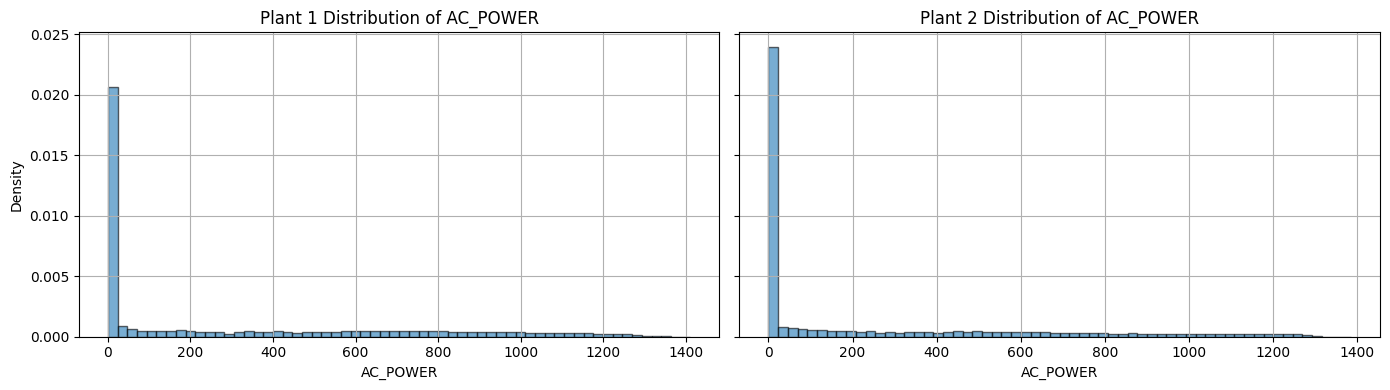

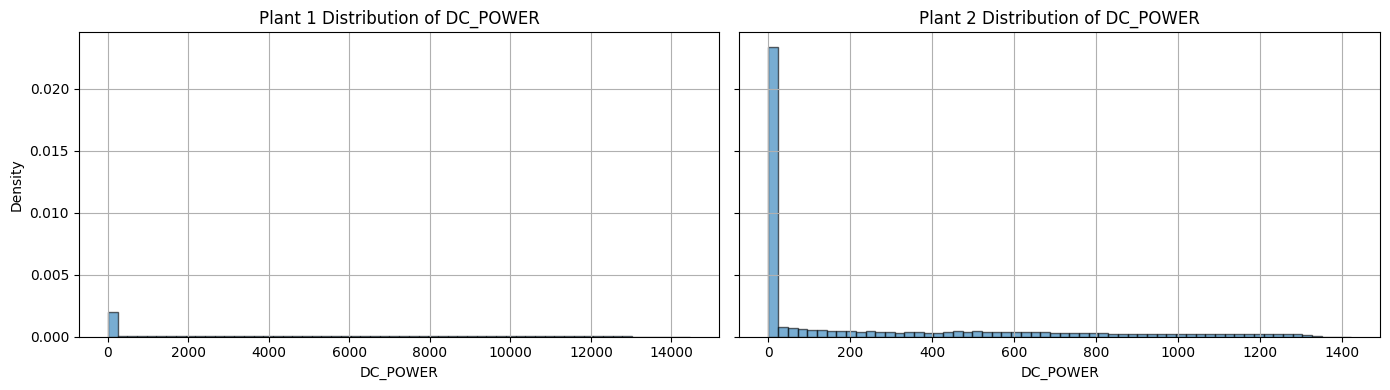

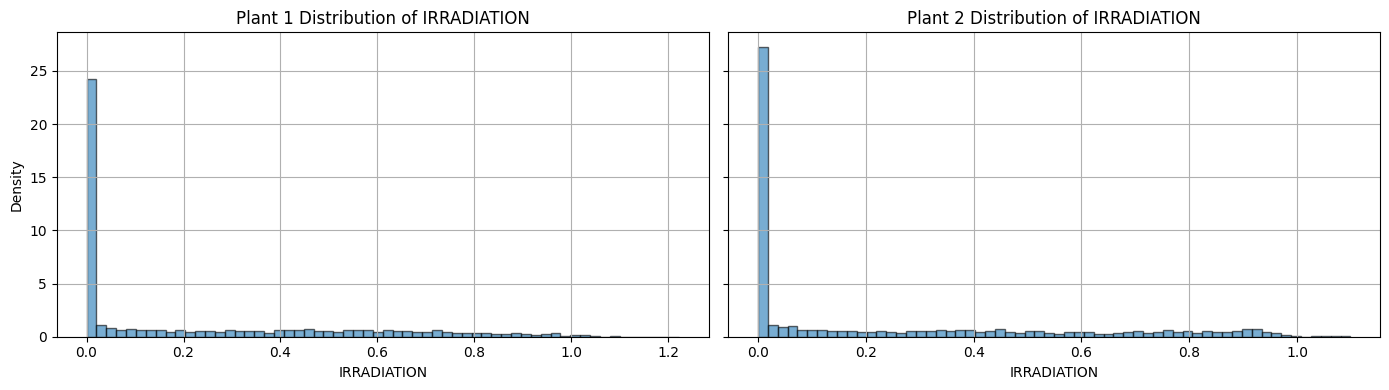

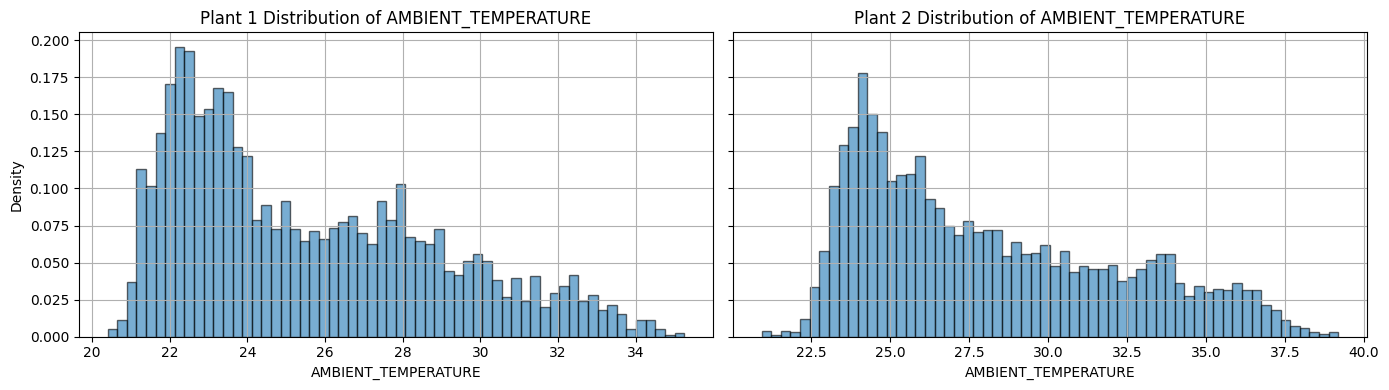

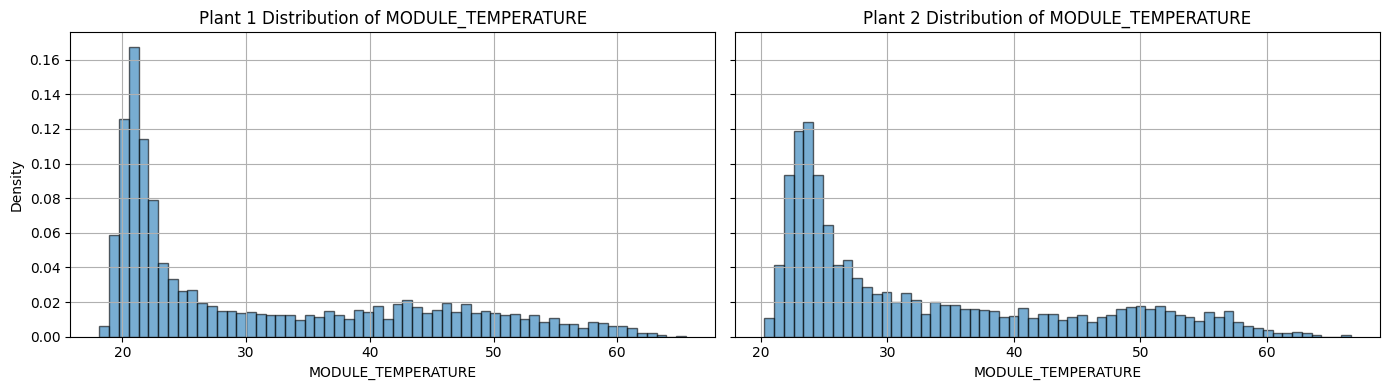

In [ ]:
# Side-by-side histograms comparing distributions for Plant 1 vs Plant 2
import matplotlib.pyplot as plt

vars_to_inspect = ['AC_POWER', 'DC_POWER', 'IRRADIATION', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']
plant_names = ['Plant 1', 'Plant 2']
dfs = [df_plt1_merged, df_plt2_merged]

for var in vars_to_inspect:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

    axes[0].hist(dfs[0][var].dropna(), bins=60, density=True, alpha=0.6, edgecolor='black')
    axes[0].set_title(f'{plant_names[0]} Distribution of {var}')
    axes[0].set_xlabel(var)
    axes[0].set_ylabel('Density')
    axes[0].grid(True)

    axes[1].hist(dfs[1][var].dropna(), bins=60, density=True, alpha=0.6, edgecolor='black')
    axes[1].set_title(f'{plant_names[1]} Distribution of {var}')
    axes[1].set_xlabel(var)
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()


AC power, DC power and irradiation data show strong skew and frequent zero values due to night or cloud cover. Temperatures vary by plant: Plant 1 is cooler and more stable, while Plant 2 has broader and hotter profiles.

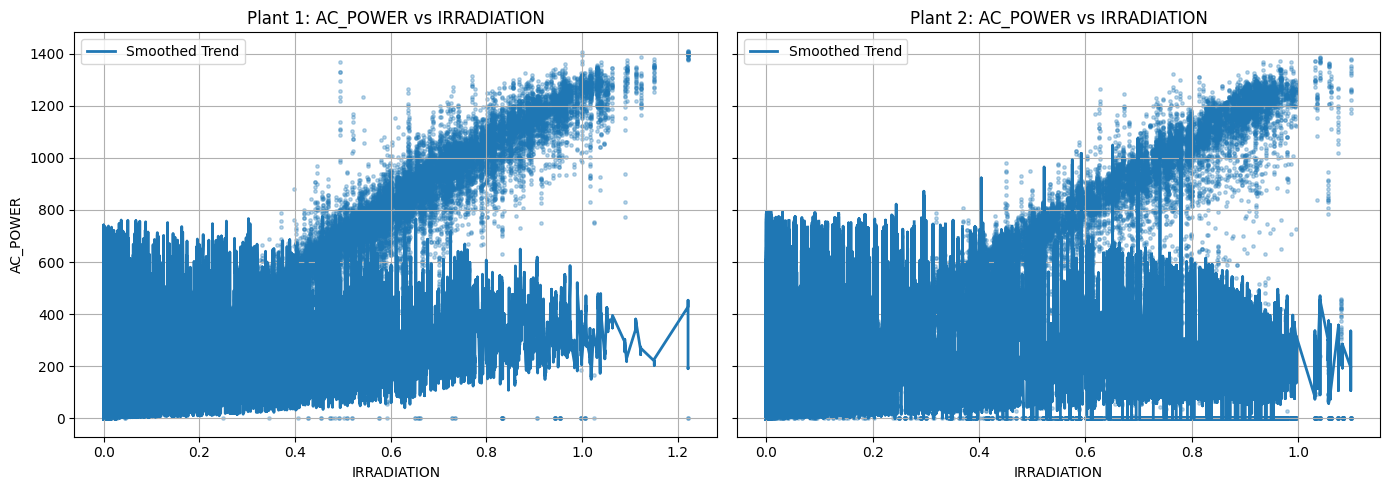

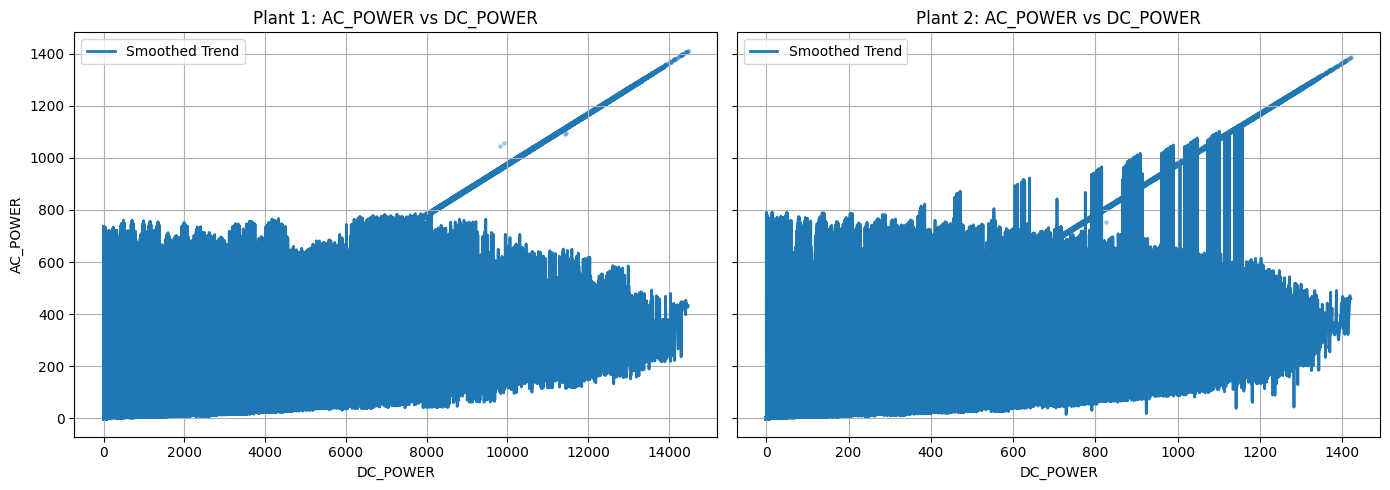

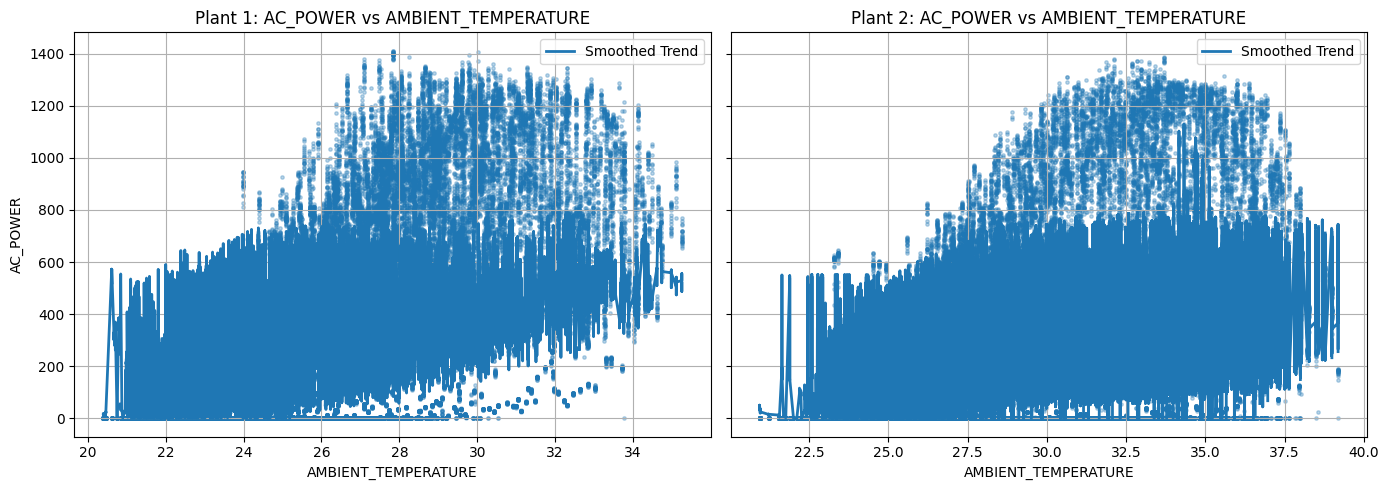

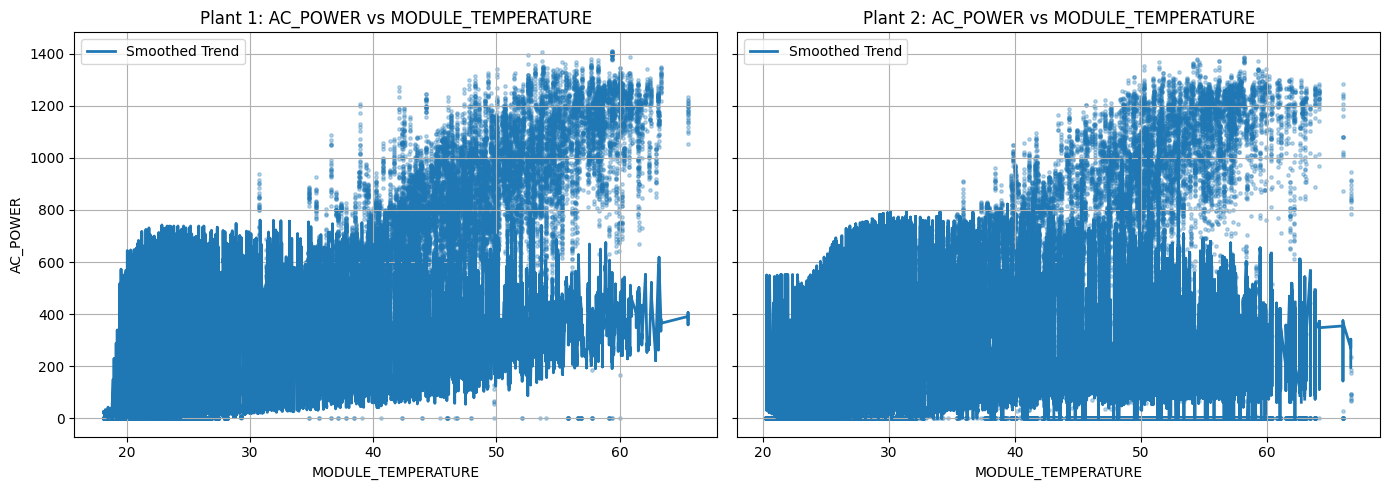

In [ ]:
# Scatter plots with smoothed trend lines — AC_POWER vs DC_POWER & IRRADIATION, AMBIENT_TEMPERATURE, MODULE_TEMPERATURE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pairs = [
    ('IRRADIATION', 'AC_POWER'),
    ('DC_POWER', 'AC_POWER'),
    ('AMBIENT_TEMPERATURE', 'AC_POWER'),
    ('MODULE_TEMPERATURE', 'AC_POWER')
]

# Comparison side-by-side: Plant 1 vs Plant 2 for each pair
for x_var, y_var in pairs:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

    # Plant 1
    df = df_plt1_merged
    axes[0].scatter(df[x_var], df[y_var], s=6, alpha=0.3)
    # Smoothed trend for Plant 1
    sorted_idx = np.argsort(df[x_var].values)
    x_sorted = df[x_var].values[sorted_idx]
    y_series = pd.Series(df[y_var].values)
    y_smooth = y_series.rolling(window=50, min_periods=1).mean().values[sorted_idx]
    axes[0].plot(x_sorted, y_smooth, linewidth=2, label='Smoothed Trend')
    axes[0].set_title(f'Plant 1: {y_var} vs {x_var}')
    axes[0].set_xlabel(x_var)
    axes[0].set_ylabel(y_var)
    axes[0].grid(True)
    axes[0].legend()

    # Plant 2
    df = df_plt2_merged
    axes[1].scatter(df[x_var], df[y_var], s=6, alpha=0.3)
    sorted_idx = np.argsort(df[x_var].values)
    x_sorted = df[x_var].values[sorted_idx]
    y_series = pd.Series(df[y_var].values)
    y_smooth = y_series.rolling(window=50, min_periods=1).mean().values[sorted_idx]
    axes[1].plot(x_sorted, y_smooth, linewidth=2, label='Smoothed Trend')
    axes[1].set_title(f'Plant 2: {y_var} vs {x_var}')
    axes[1].set_xlabel(x_var)
    axes[1].grid(True)
    axes[1].legend()

    plt.tight_layout()
    plt.show()


- **AC vs. IRRADIATION / DC_POWER:** Linear increase in AC with irradiance up to inverter limit; Plant 1 shows tighter DC–AC correlation than Plant 2.
- **AC vs. AMBIENT_TEMPERATURE:** - AC output rises modestly through 20–30 °C, then declines slowly above 32 °C due to reduced module efficiency.
- **Module Temperature Effect**:
Morning performance climbs with warming panels, peaks around 50 °C, then drops with thermal stress.
- **Inter-Plant Differences**:
Plant 1 operates on a larger AC/DC scale, but both plants share core performance patterns driven by irradiance, temperature, and inverter thresholds.


In [ ]:
# Checking Outliers
df_plt1_merged[['AC_POWER', 'DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']].any() < 0

,0
AC_POWER,False
DC_POWER,False
DAILY_YIELD,False
TOTAL_YIELD,False


In [ ]:
# Checking Outliers
df_plt2_merged[['AC_POWER', 'DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']].any() < 0

,0
AC_POWER,False
DC_POWER,False
DAILY_YIELD,False
TOTAL_YIELD,False


# Data Imputation

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

def imputer(df, imputer=KNNImputer(n_neighbors=10)):
    inverter_dfs = []

    # Ensure DATE_TIME is datetime
    df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])

    # List of inverters
    inverters = df['INVERTER'].unique()

    for inverter in inverters:
        # Filter rows for the current inverter
        inverter_df = df[df['INVERTER'] == inverter].copy()

        # Set DATE_TIME as index for time-aware imputation (if needed)
        inverter_df.set_index('DATE_TIME', inplace=True)

        # Save non-numeric columns
        non_numeric_cols = inverter_df[['PLANT_NAME']].copy()

        # Select numeric columns only
        numeric_cols = inverter_df.select_dtypes(include='number')

        # Apply KNN imputer
        imputed_array = imputer.fit_transform(numeric_cols)
        imputed_df = pd.DataFrame(imputed_array, columns=numeric_cols.columns, index=numeric_cols.index)

        # Reconstruct full DataFrame
        imputed_df['PLANT_NAME'] = non_numeric_cols['PLANT_NAME']
        imputed_df['INVERTER'] = inverter
        imputed_df = imputed_df.reset_index()  # restore DATE_TIME

        # Append to list
        inverter_dfs.append(imputed_df)

    # Combine all imputed inverter DataFrames
    df_imputed = pd.concat(inverter_dfs, ignore_index=True)

    return df_imputed


In [ ]:
# Run imputer on your actual dataset
df_plt1_merged = imputer(df_plt1_merged)
df_plt2_merged = imputer(df_plt2_merged)

# Check if nulls are gone
print(df_plt1_merged.isnull().sum())
print("########################")
print(df_plt2_merged.isnull().sum())


DATE_TIME              0
PLANT_ID               0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
PLANT_NAME             0
INVERTER               0
dtype: int64
########################
DATE_TIME              0
PLANT_ID               0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
PLANT_NAME             0
INVERTER               0
dtype: int64


In [ ]:
df_plt1_merged.head()

,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,PLANT_NAME,INVERTER
0,2020-05-15 00:00:00,4135001.0,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0,Plant_1,PLANT_1_INVERTER_1
1,2020-05-15 00:15:00,4135001.0,0.0,0.0,0.0,6259559.0,25.084589,22.761668,0.0,Plant_1,PLANT_1_INVERTER_1
2,2020-05-15 00:30:00,4135001.0,0.0,0.0,0.0,6259559.0,24.935753,22.592306,0.0,Plant_1,PLANT_1_INVERTER_1
3,2020-05-15 00:45:00,4135001.0,0.0,0.0,0.0,6259559.0,24.846130,22.360852,0.0,Plant_1,PLANT_1_INVERTER_1
4,2020-05-15 01:00:00,4135001.0,0.0,0.0,0.0,6259559.0,24.621525,22.165423,0.0,Plant_1,PLANT_1_INVERTER_1


In [ ]:
df_plt2_merged.head()

,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,PLANT_NAME,INVERTER
0,2020-05-15 00:00:00,4136001.0,0.0,0.0,9425.0,2429011.0,27.004764,25.060789,0.0,Plant_2,PLANT_2_INVERTER_1
1,2020-05-15 00:15:00,4136001.0,0.0,0.0,9425.0,2429011.0,26.880811,24.421869,0.0,Plant_2,PLANT_2_INVERTER_1
2,2020-05-15 00:30:00,4136001.0,0.0,0.0,9425.0,2429011.0,26.682055,24.427290,0.0,Plant_2,PLANT_2_INVERTER_1
3,2020-05-15 00:45:00,4136001.0,0.0,0.0,9425.0,2429011.0,26.500589,24.420678,0.0,Plant_2,PLANT_2_INVERTER_1
4,2020-05-15 01:00:00,4136001.0,0.0,0.0,7540.0,2429011.0,26.596148,25.088210,0.0,Plant_2,PLANT_2_INVERTER_1


In [ ]:
df_plt1_merged.to_csv('df_plt1_merged.csv', index=False)
df_plt2_merged.to_csv('df_plt2_merged.csv', index=False)

We’re moving forward with Plant 1 data for model training. Plant 1 and Plant 2 differ in scale, weather patterns, and sensor characteristics (e.g. Plant 1’s near-perfect DC→AC correlation vs. Plant 2’s noisier measurements). Trying to force a single model over both sites risks under-fitting the unique dynamics of each plant. For now, the focus is on developing and validating a robust forecasting pipeline for Plant 1.

# Forecasting One-Step ahead Power Production for a single Plant

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
df_plant1 = pd.read_csv('df_plt1_merged.csv')

In [ ]:
df_plant1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70004 entries, 0 to 70003
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            70004 non-null  object 
 1   PLANT_ID             70004 non-null  float64
 2   DC_POWER             70004 non-null  float64
 3   AC_POWER             70004 non-null  float64
 4   DAILY_YIELD          70004 non-null  float64
 5   TOTAL_YIELD          70004 non-null  float64
 6   AMBIENT_TEMPERATURE  70004 non-null  float64
 7   MODULE_TEMPERATURE   70004 non-null  float64
 8   IRRADIATION          70004 non-null  float64
 9   PLANT_NAME           70004 non-null  object 
 10  INVERTER             70004 non-null  object 
dtypes: float64(8), object(3)
memory usage: 5.9+ MB


In May we observed numerous multi-hour gaps that make it impossible to build full 24-hour look-back windows for our LSTM. To ensure every training sample contains a contiguous day of data, we simply drop everything before June 1, 2020

In [ ]:
# Removing data points before 2020-06-01 due to data inconsistencies
df_plant1["DATE_TIME"] = pd.to_datetime(df_plant1["DATE_TIME"])
cutoff = pd.Timestamp("2020-06-01")
df_plant1 = df_plant1[df_plant1["DATE_TIME"] >= cutoff].copy()

Aggregating data and getting the mean, standard deviation, and min/max to get Plant-Level Power Production Forecasting for Plant 1.

In [ ]:
df_plant1_alt = (
    df_plant1.groupby(["PLANT_ID", "DATE_TIME"])
      .agg(
          {
          "AC_POWER" : "sum",
          "DC_POWER" : "sum",
          "IRRADIATION" : ["mean", "std", "min", "max"],
          "MODULE_TEMPERATURE" : ["mean", "std"],
          "AMBIENT_TEMPERATURE" : ["mean", "std"],
          }
      )
)

In [ ]:
# Dataframe formatting
df_plant1_alt.columns = ["_".join(col).strip() for col in df_plant1_alt.columns.values]
df_plant1_alt = df_plant1_alt.reset_index().rename(columns =
  {
    "AC_POWER_sum" : "AC_POWER",
    "DC_POWER_sum" : "DC_POWER"
  }
)

Interpolating for missing value in the aggregate plant production dataframe.

In [ ]:
_indx = pd.date_range(start = df_plant1_alt["DATE_TIME"].min(), end = df_plant1_alt["DATE_TIME"].max(), freq = "15min")

df_plant1_alt = df_plant1_alt.set_index("DATE_TIME").reindex(_indx)
df_plant1_alt.index.name = "DATE_TIME"

num_cols = df_plant1_alt.select_dtypes(include = ["number"]).columns
df_plant1_alt[num_cols] = df_plant1_alt[num_cols].interpolate(method="time").ffill().bfill()

Converting to sine and cosine cyclical time encoding as deep learning neural networks can understand these time encoding pattern better than raw time in hour, minutes and seconds.

In [ ]:
fractional_hour_split = df_plant1_alt.index.hour + df_plant1_alt.index.minute / 60
df_plant1_alt["hour_sin"] = np.sin(2 * np.pi * fractional_hour_split / 24)
df_plant1_alt["hour_cos"] = np.cos(2 * np.pi * fractional_hour_split / 24)
df_plant1_alt = df_plant1_alt.reset_index()

Feature_List contain all the independent feature.

referencing Kelachukwu's Solar Photovoltaic Power Forecasting paper (https://doi.org/10.3390/su142417005), we decided to use AC_Power as one of the independent feature as it is autoregressive in nature. Solar AC power evolves smoothly and also depends on recent history, so historical values carry some level of informational importance about the next values.


Target_list has the value we need to forecast next.

In [ ]:
feature_list = ["AC_POWER", "DC_POWER", "IRRADIATION_mean", "IRRADIATION_std", "MODULE_TEMPERATURE_mean", "AMBIENT_TEMPERATURE_mean", "hour_sin", "hour_cos"]

In [ ]:
target_list = "AC_POWER"

## Feed Forward Neural Network Forecasting (FFNN)

Transforming the sequential Time-Series data into learning samples of fixed-length feature vectors that the FeedForward Neural Network can process. This flattening feature also helps in capturing autoregressive history of AC power as well.

In [ ]:
TIME_STEPS = 96 # last 96 rows represent 24 hours 15 minutes interval

# Feed forward NNs cannot remember sequences ---> flatten the past TIME_STEPS into vector will help
def _flattenWindowForFFNN(features, target, timeSteps):
    Xs = []
    ys = []
    for iteration in range(timeSteps, len(features)):
        Xs.append(features[iteration-timeSteps:iteration].values.flatten())
        ys.append(target[iteration])
    return np.array(Xs), np.array(ys)

In [ ]:
X, y = _flattenWindowForFFNN(df_plant1_alt[feature_list], df_plant1_alt[target_list], TIME_STEPS)
print(f"feature shape is {X.shape} and target shape is {y.shape}")

feature shape is (1536, 768) and target shape is (1536,)


In [ ]:
# Splitting the data
X_len = len(X)
split = int(X_len * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
#Scaling the data to speed up convergence
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

y_train_scaled = target_scaler.fit_transform(y_train.reshape(-1,1)).flatten()
y_test_scaled = target_scaler.transform(y_test.reshape(-1,1)).flatten()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

#FFNN model architecture
inputDimension = X_train_scaled.shape[1]
ffnnModel = models.Sequential(
    [
    layers.Input(shape = (inputDimension,)),
    layers.Dense(256, activation = "relu"),
    layers.Dropout(0.2),
    layers.Dense(128, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dropout(0.1),
    layers.Dense(1)
    ]
)

ffnnModel.compile(optimizer = "adam", loss = "mse", metrics = ["mae"])
ffnnModel.summary()
earlyStop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,081 (930.00 KB)

 Trainable params: 238,081 (930.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = ffnnModel.fit(X_train_scaled, y_train_scaled, validation_split = 0.1, epochs = 50, batch_size = 64, callbacks = [earlyStop])

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - loss: 0.1688 - mae: 0.3014 - val_loss: 0.0163 - val_mae: 0.0989
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0251 - mae: 0.1177 - val_loss: 0.0114 - val_mae: 0.0715
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mae: 0.0842 - val_loss: 0.0117 - val_mae: 0.0665
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mae: 0.0809 - val_loss: 0.0090 - val_mae: 0.0608
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mae: 0.0729 - val_loss: 0.0086 - val_mae: 0.0570
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mae: 0.0706 - val_loss: 0.0131 - val_mae: 0.0673
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0112 - mae: 0.0648 - val_loss: 0.0086 - val_mae: 0.0541
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mae: 0.0663 - val_loss: 0.0082 - val_mae: 0.0536
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mae

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_prediction_scaled = ffnnModel.predict(X_test_scaled).flatten()
y_prediction_ffnnModel = target_scaler.inverse_transform(y_prediction_scaled.reshape(-1,1)).flatten()

rmse = np.sqrt(mean_squared_error(y_test, y_prediction_scaled))
mae = mean_absolute_error(y_test, y_prediction_ffnnModel)
print(f"Root Mean Squared error is {rmse:.2f} kW and the Mean Absolute Error is {mae:.2f} kW.")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Root Mean Squared error is 9154.23 kW and the Mean Absolute Error is 1370.95 kW.


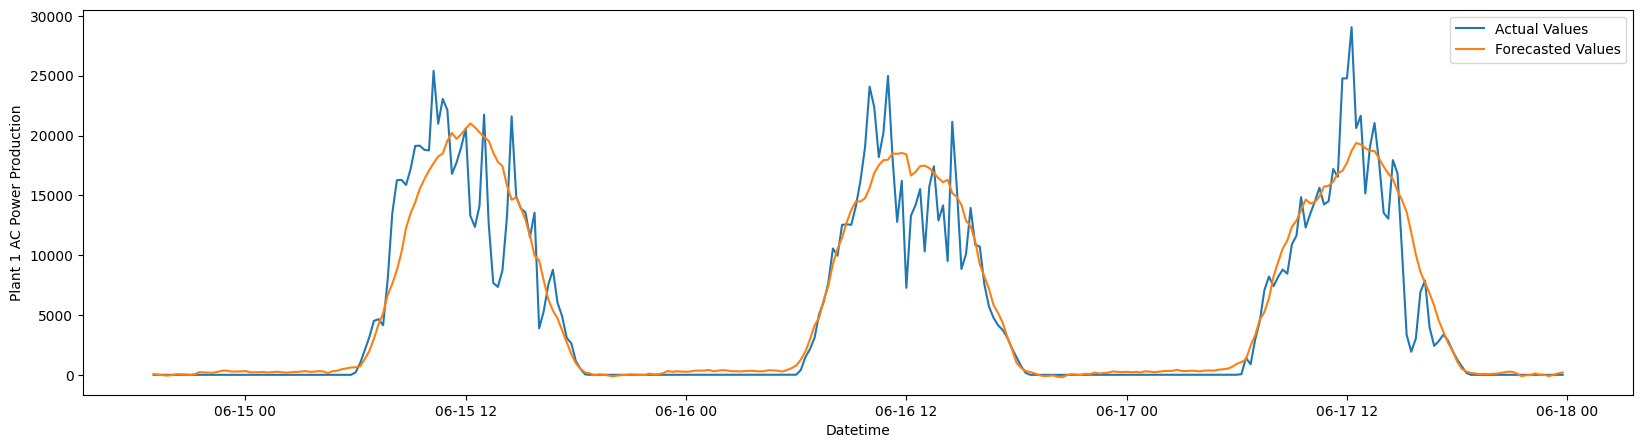

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.plot(df_plant1_alt["DATE_TIME"].iloc[-len(y_test):], y_test, label = "Actual Values")
plt.plot(df_plant1_alt["DATE_TIME"].iloc[-len(y_test):], y_prediction_ffnnModel, label = "Forecasted Values")
plt.xlabel("Datetime")
plt.ylabel("Plant 1 AC Power Production")
plt.legend()
plt.show()

From the above plot, we can see that the model somewhat learnt the time-dependent behavior of solar output.

The Root Mean Squared Error (RMSE) value show that the errors are larger during spikes or drops, and the Mean Absolute Error (MAE) says that the model is off by about 1.34 kW. The model seems to capture the general daily trends but fails to capture the sharp peaks and valleys.

## Convolutional Neural Networks (CNN)

In [ ]:
# Training CNN window modified for 3 dimensional input.
def _windowForCNNLSTM(features, target, timeSteps):
    Xs = []
    ys = []
    for iteration in range(timeSteps, len(features)):
        Xs.append(features[iteration-timeSteps:iteration].values)
        ys.append(target[iteration])
    return np.array(Xs), np.array(ys)

In [ ]:
X, y = _windowForCNNLSTM(df_plant1_alt[feature_list], df_plant1_alt[target_list], TIME_STEPS)
print(f"CNN input shape -> {X.shape}")

CNN input shape -> (1536, 96, 8)


In [ ]:
X_len = len(X)
split = int(X_len * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
# Scaling features and targets for CNN
n_features = X_train.shape[2]

scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, n_features))
X_test_scaled = scaler_X.transform(X_test.reshape(-1, n_features))

X_train = X_train_scaled.reshape(X_train.shape)
X_test = X_test_scaled.reshape(X_test.shape)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1,1)).flatten()

After interpreting the spiky nature, smooth ramps and long periods of near zero power during nighttime in AC Power from the Data analysis and the FFNN model output, we decided to use the Huber loss function to improve our output so that the model can learn the normal daytime curves.

In [ ]:
import tensorflow.keras.losses as losses

#CNN model architecture
cnnModel = models.Sequential(
    [
    layers.Conv1D(filters = 64, kernel_size = 5, activation = 'relu', input_shape = (TIME_STEPS, n_features)),
    layers.Conv1D(filters = 64, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'relu')
  ]
)
cnnModel.compile(optimizer='adam', loss = losses.Huber(delta = 1500.0), metrics = ['mae'])
cnnModel.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 92, 64)         │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 90, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 45, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2880)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       184,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199,425 (779.00 KB)

 Trainable params: 199,425 (779.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnnModel.fit(X_train, y_train_scaled, validation_split=0.1, epochs=50, batch_size=64, callbacks=[earlyStop], verbose=1)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0224 - mae: 0.1183 - val_loss: 0.0068 - val_mae: 0.0741
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mae: 0.0587 - val_loss: 0.0046 - val_mae: 0.0564
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mae: 0.0509 - val_loss: 0.0055 - val_mae: 0.0633
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mae: 0.0512 - val_loss: 0.0052 - val_mae: 0.0608
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mae: 0.0450 - val_loss: 0.0048 - val_mae: 0.0610
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mae: 0.0463 - val_loss: 0.0060 - val_mae: 0.0652
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mae: 0.0470 - val_loss: 0.0071 - val_mae: 0.0702


In [ ]:
y_prediction_scaled = cnnModel.predict(X_test).flatten()
y_prediction_cnnModel = scaler_y.inverse_transform(y_prediction_scaled.reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(y_test, y_prediction_cnnModel))
mae = mean_absolute_error(y_test, y_prediction_cnnModel)

print(f"Root Mean Squared error is {rmse:.2f} kW, and Mean Absolute Error : {mae:.2f} kW")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
Root Mean Squared error is 2905.11 kW, and Mean Absolute Error : 1446.18 kW


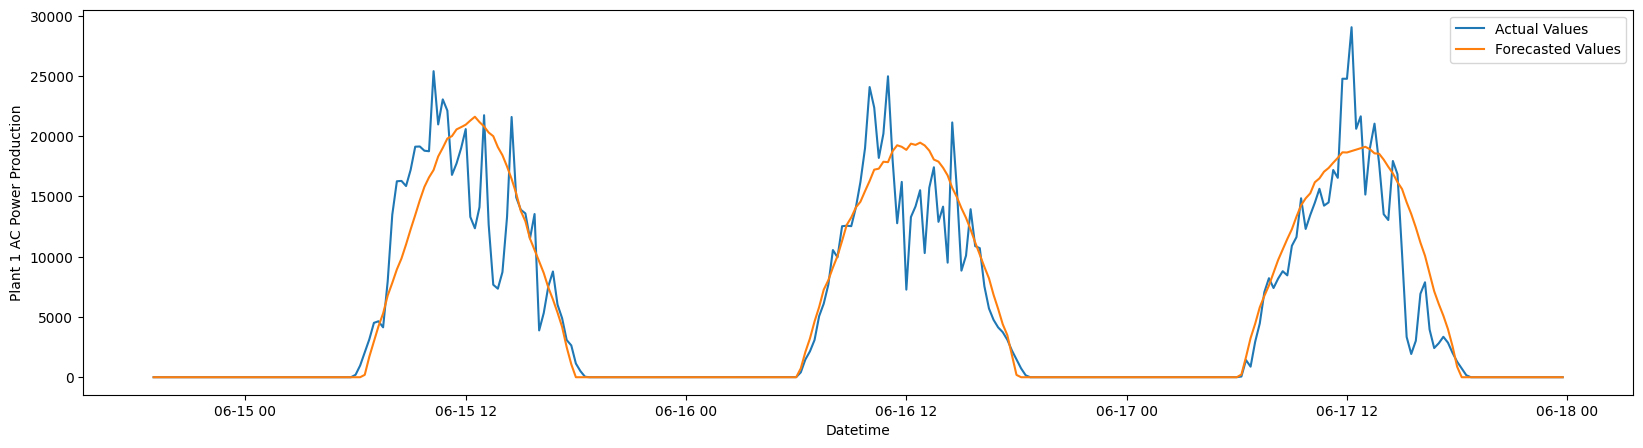

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df_plant1_alt["DATE_TIME"].iloc[-len(y_test):], y_test, label = "Actual Values")
plt.plot(df_plant1_alt["DATE_TIME"].iloc[-len(y_test):], y_prediction_cnnModel, label = "Forecasted Values")
plt.xlabel("Datetime")
plt.ylabel("Plant 1 AC Power Production")
plt.legend()
plt.show()

From the above results, we can notice that CNN can infact capture short-term local patterns well, and forecast the daily pattern reliably as there is low MAE output from this. While the RMSE on this time-series data seems to be higher as the model is underpredicting the peaks and smooth spikes.

## Long Short Term Memory (LSTM)

In [ ]:
# Window method already applied on X
print(f"LSTM input shape ---> {X.shape}")

LSTM input shape ---> (1536, 96, 8)


After running a few trials, we came across the "Long-term solar photovoltaic power generation forecasting using LSTM with Nadam Optimizer" (doi : 10.1002/ese3.1178) paper where they compared different optimizers on time-series data and Nadam optimizer came out as the best one. Inspired from this, we decided to use Nadam optimizer here as well.

In [ ]:
import tensorflow.keras.optimizers as op

#LSTM model architecture
lstmModel = models.Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(TIME_STEPS, n_features)),
    layers.LSTM(32),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

lstmModel.compile(optimizer= op.Nadam(learning_rate=0.005), loss='mse', metrics=['mae'])
lstmModel.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 96, 64)         │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,193 (125.75 KB)

 Trainable params: 32,193 (125.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = lstmModel.fit(X_train, y_train_scaled, validation_split=0.1, epochs=50, batch_size=64, callbacks=[earlyStop], verbose=1)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0547 - mae: 0.1513 - val_loss: 0.0191 - val_mae: 0.0826
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0091 - mae: 0.0556 - val_loss: 0.0184 - val_mae: 0.0768
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0079 - mae: 0.0488 - val_loss: 0.0095 - val_mae: 0.0637
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0072 - mae: 0.0482 - val_loss: 0.0085 - val_mae: 0.0566
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0069 - mae: 0.0468 - val_loss: 0.0085 - val_mae: 0.0570
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mae: 0.0474 - val_loss: 0.0109 - val_mae: 0.0722
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0069 - mae: 0.0480 - val_loss: 0.0074 - val_mae: 0.0528
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059 - mae: 0.0421 - val_loss: 0.0077 - val_mae: 0.0561
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.006

In [ ]:
y_prediction_scaled = lstmModel.predict(X_test).flatten()
y_prediction_lstmModel = scaler_y.inverse_transform(y_prediction_scaled.reshape(-1,1)).flatten()
rmse = np.sqrt(mean_squared_error(y_test, y_prediction_lstmModel))
mae = mean_absolute_error(y_test, y_prediction_lstmModel)

print(f"Root Mean Squared error is {rmse:.2f} kW, and Mean Absolute Error : {mae:.2f} kW")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Root Mean Squared error is 2206.16 kW, and Mean Absolute Error : 1182.46 kW


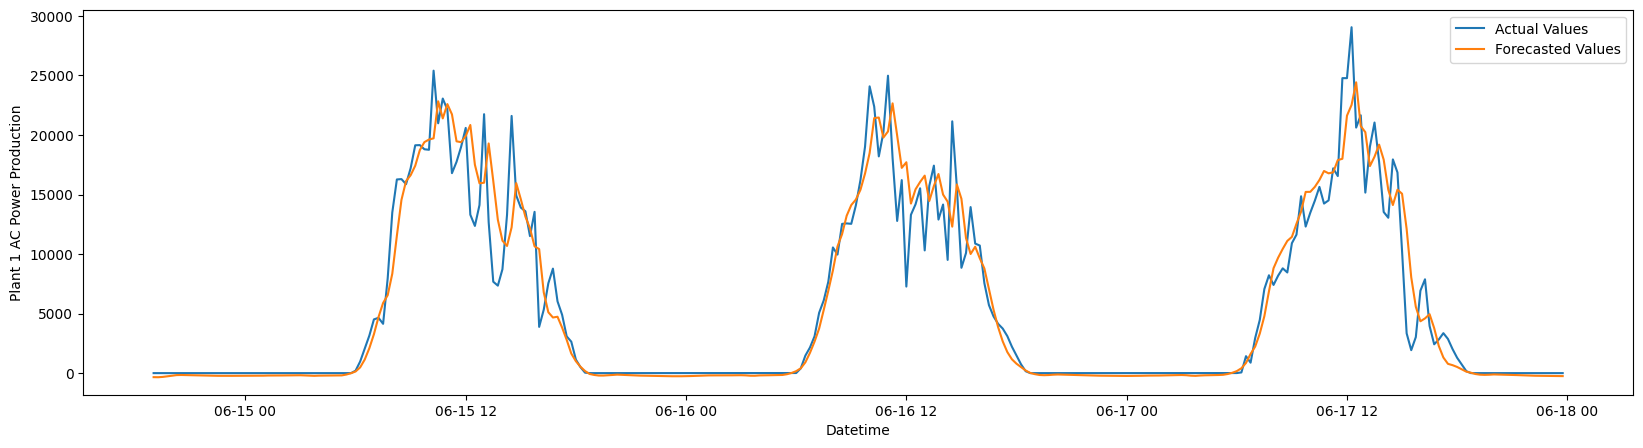

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df_plant1_alt["DATE_TIME"].iloc[-len(y_test):], y_test, label = "Actual Values")
plt.plot(df_plant1_alt["DATE_TIME"].iloc[-len(y_test):], y_prediction_lstmModel, label = "Forecasted Values")
plt.xlabel("Datetime")
plt.ylabel("Plant 1 AC Power Production")
plt.legend()
plt.show()

The metrics and plot received from this LSTM model shows that it is performing quiet well. It is able to capture the temporal dependencies effectively and also reduces the squared errors at the peaks thereby adapting to the daily cycle better.

## CNN-LSTM Hybrid Model

In [ ]:
print("Input shape for CNN-LSTM ---> ", X.shape)

Input shape for CNN-LSTM --->  (1536, 96, 8)


Derived from the CNN and LSTM results, we built a hybrid model to see its performance on our dataset. We utilized Nadam optimizer and Huber loss again to use its benefits and see if it is beneficial while we use our hybrid model as well.

In [ ]:
#CNNLSTM model architecture
cnnlstmModel = models.Sequential(
    [
    #CNN-part
    layers.Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(TIME_STEPS, n_features)),
    layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    # layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.2),

    #LSTM-part
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(32),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1, activation = 'relu')
  ]
)

cnnlstmModel.compile(optimizer=op.Nadam(learning_rate = 0.005), loss=losses.Huber(delta = 1500.0), metrics=['mae'])
cnnlstmModel.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 92, 128)        │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 90, 64)         │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 90, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 90, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,417 (298.50 KB)

 Trainable params: 76,417 (298.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnnlstmModel.fit(X_train, y_train_scaled, validation_split = 0.1, epochs = 50, batch_size = 64, callbacks = [earlyStop], verbose = 1)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0400 - mae: 0.1822 - val_loss: 0.0067 - val_mae: 0.0781
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0043 - mae: 0.0512 - val_loss: 0.0093 - val_mae: 0.0937
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0054 - mae: 0.0561 - val_loss: 0.0053 - val_mae: 0.0599
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0039 - mae: 0.0495 - val_loss: 0.0064 - val_mae: 0.0719
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0042 - mae: 0.0483 - val_loss: 0.0061 - val_mae: 0.0703
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0046 - mae: 0.0518 - val_loss: 0.0042 - val_mae: 0.0549
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0039 - mae: 0.0474 - val_loss: 0.0060 - val_mae: 0.0614
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0040 - mae: 0.0498 - val_loss: 0.0072 - val_mae: 0.0657
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.003

In [ ]:
y_prediction_scaled = cnnlstmModel.predict(X_test).flatten()
y_prediction_cnnlstmModel = scaler_y.inverse_transform(y_prediction_scaled.reshape(-1,1)).flatten()

# Clipping the negative predictions to zero.
y_pred = np.clip(y_prediction_cnnModel, 0, None)
rmse = np.sqrt(mean_squared_error(y_test, y_prediction_cnnModel))
mae = mean_absolute_error(y_test, y_prediction_cnnModel)
print(f"Root Mean Squared error is {rmse:.2f} kW, and Mean Absolute Error : {mae:.2f} kW")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Root Mean Squared error is 2905.11 kW, and Mean Absolute Error : 1446.18 kW


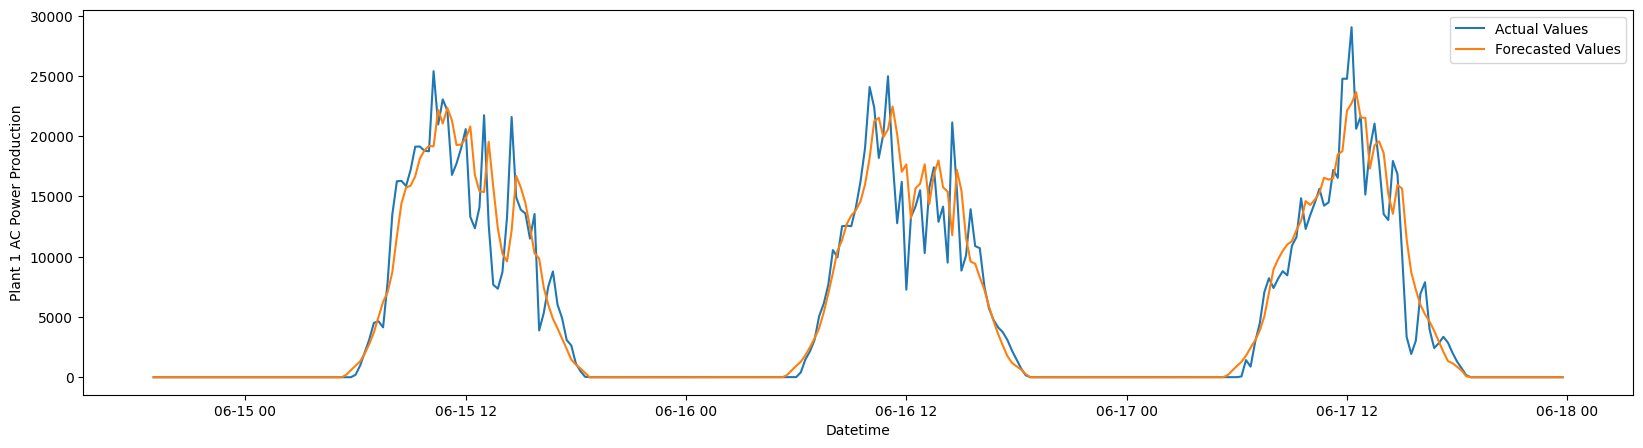

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df_plant1_alt["DATE_TIME"].iloc[-len(y_test):], y_test, label = "Actual Values")
plt.plot(df_plant1_alt["DATE_TIME"].iloc[-len(y_test):], y_prediction_cnnlstmModel, label = "Forecasted Values")
plt.xlabel("Datetime")
plt.ylabel("Plant 1 AC Power Production")
plt.legend()
plt.show()

The CNN LSTM model trained here produces smooth and stable forecast but it also squashes rare spikes which could inflate the RMSE value further. The MAE value is quite reasonable as the model is able to predict daytime power generation with low errors, while at the same time we expected RMSE to be lower but it doesn't seem so whixh maybe due to peak large errors.

**Overall,**
For this dataset while forecasting, LSTM model tuned with Nadam seems to be the best model as it gives a stable RMSE and MAE value, which means the model handles temporal patterns and peaks well, and also, it handles spiky AC power quite with ease. After that, the CNN model with Huber loss and CNN-LSTM model seem to be on par with each other. They both have almost the same RMSE and MAE value as well, which means the forecasts are stable in nature but still smooth out sharp noon spikes, inflating the RMSE values. The worst performing network is FFNN where it is able to capture the trend but fails at peak, and also has a very high RMSE value due to these spikes.

